In [1]:
pip install -r requirements.txt

In [2]:
import yfinance as yf
import pandas as pd
import pandas_ta as ta
import matplotlib.pyplot as plt

In [3]:
# List of 10 companies
companies = ['AAPL', 'MSFT', 'GOOGL', 'AMZN', 'TSLA', 'ADBE', 'NVDA', 'JPM', 'CSCO', 'NFLX']
symbols=" ".join(companies)
tickers=yf.Tickers(symbols)

In [4]:
# Fetch historical data for the last 5 years
start_date = '2019-01-01'
end_date = '2024-01-01'

for ticker in companies:
    print(ticker)
    for key,value in tickers.tickers[ticker].info.items():
        print(key,":",value)

AAPL
address1 : One Apple Park Way
city : Cupertino
state : CA
zip : 95014
country : United States
phone : (408) 996-1010
website : https://www.apple.com
industry : Consumer Electronics
industryKey : consumer-electronics
industryDisp : Consumer Electronics
sector : Technology
sectorKey : technology
sectorDisp : Technology
longBusinessSummary : Apple Inc. designs, manufactures, and markets smartphones, personal computers, tablets, wearables, and accessories worldwide. The company offers iPhone, a line of smartphones; Mac, a line of personal computers; iPad, a line of multi-purpose tablets; and wearables, home, and accessories comprising AirPods, Apple TV, Apple Watch, Beats products, and HomePod. It also provides AppleCare support and cloud services; and operates various platforms, including the App Store that allow customers to discover and download applications and digital content, such as books, music, video, games, and podcasts, as well as advertising services include third-party li

In [5]:
all_data = []
# Loop through each ticker symbol
for ticker in companies:
    print(f"Fetching data for: {ticker}")
    
    # Fetch the historical data for the last 5 years
    history = tickers.tickers[ticker].history(start=start_date, end=end_date)
    
    # Optionally, you can include the ticker symbol as a column in the dataframe
    history['Ticker'] = ticker
    
    # Append the data to the list
    all_data.append(history)

# Concatenate all dataframes into a single one
final_data = pd.concat(all_data)

# Save the combined dataframe to a CSV file
final_data.to_csv("stock_data_5_years.csv")

Fetching data for: AAPL
Fetching data for: MSFT
Fetching data for: GOOGL
Fetching data for: AMZN
Fetching data for: TSLA
Fetching data for: ADBE
Fetching data for: NVDA
Fetching data for: JPM
Fetching data for: CSCO
Fetching data for: NFLX


In [6]:
# Add technical indicators using pandas-ta
final_data = final_data.reset_index()  # Ensure no MultiIndex is present
final_data['SMA_50'] = ta.sma(final_data['Close'], length=50)
final_data['SMA_200'] = ta.sma(final_data['Close'], length=200)
final_data['RSI'] = ta.rsi(final_data['Close'])

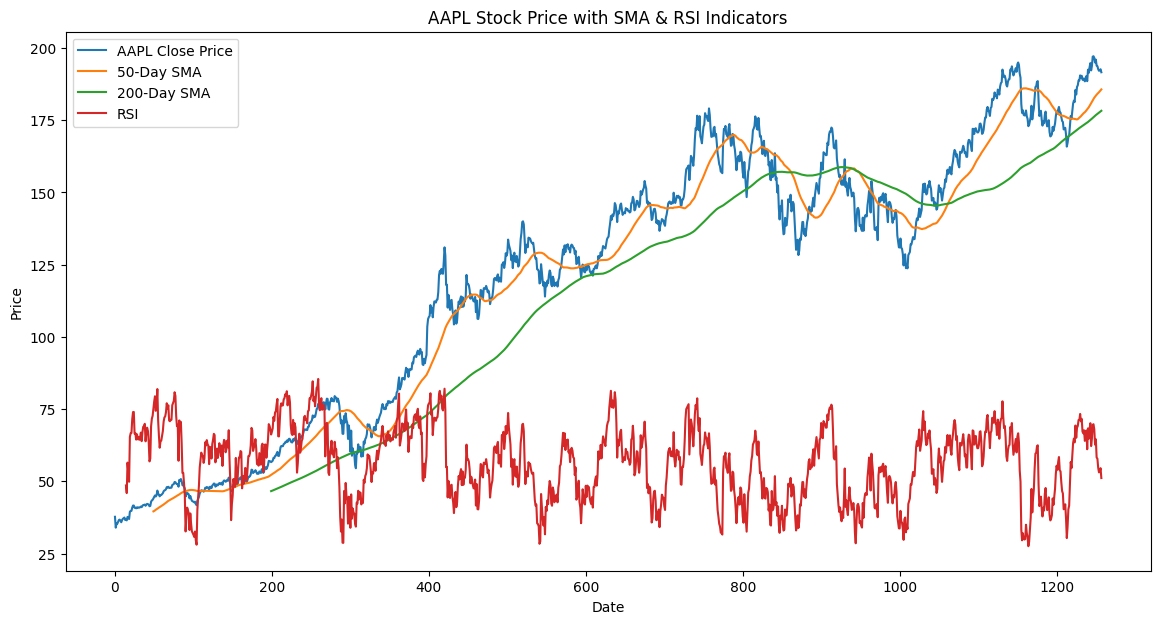

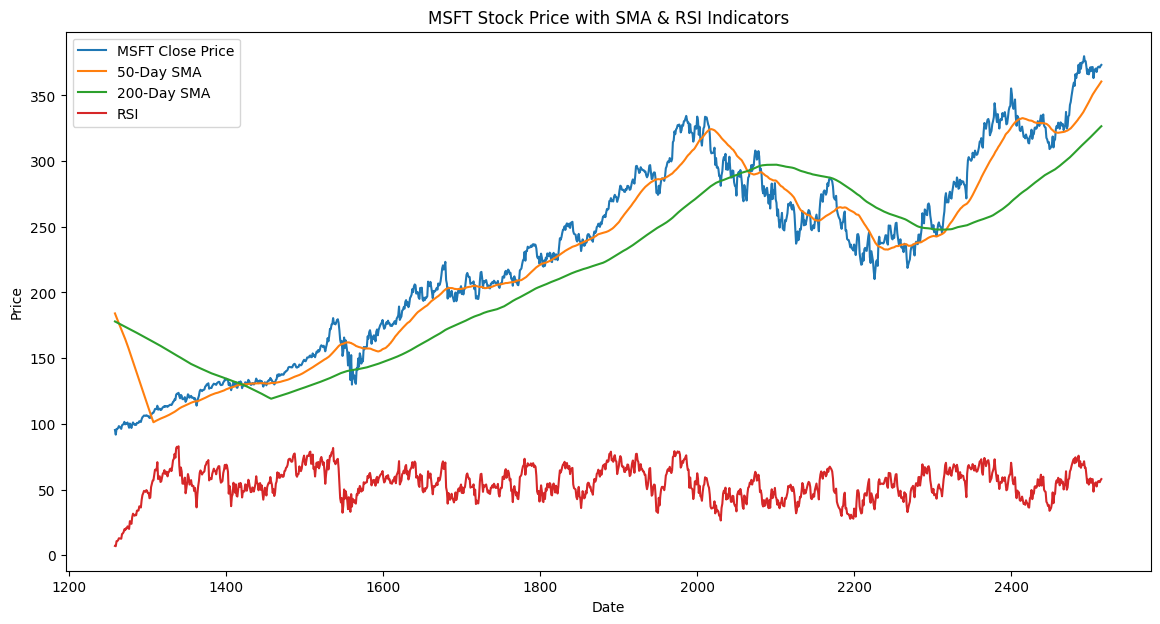

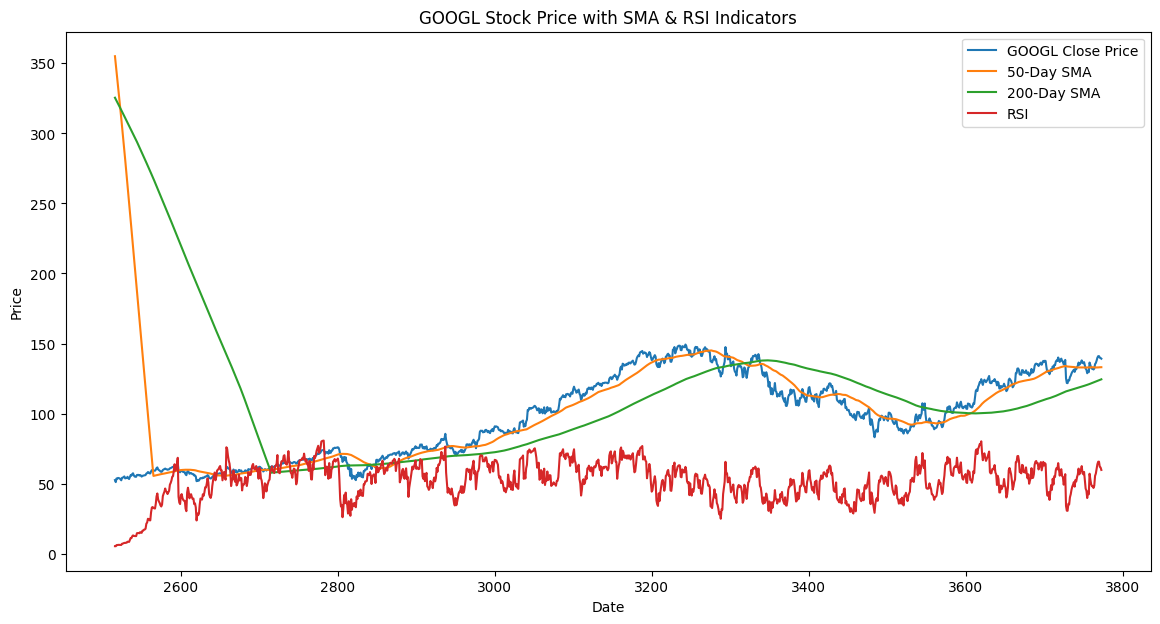

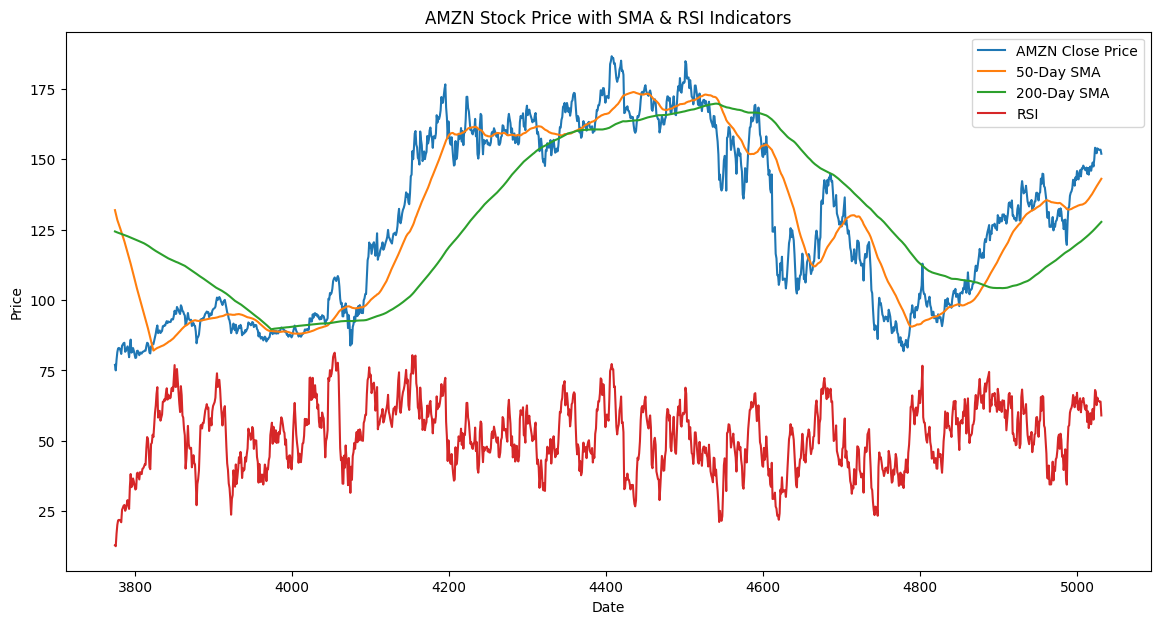

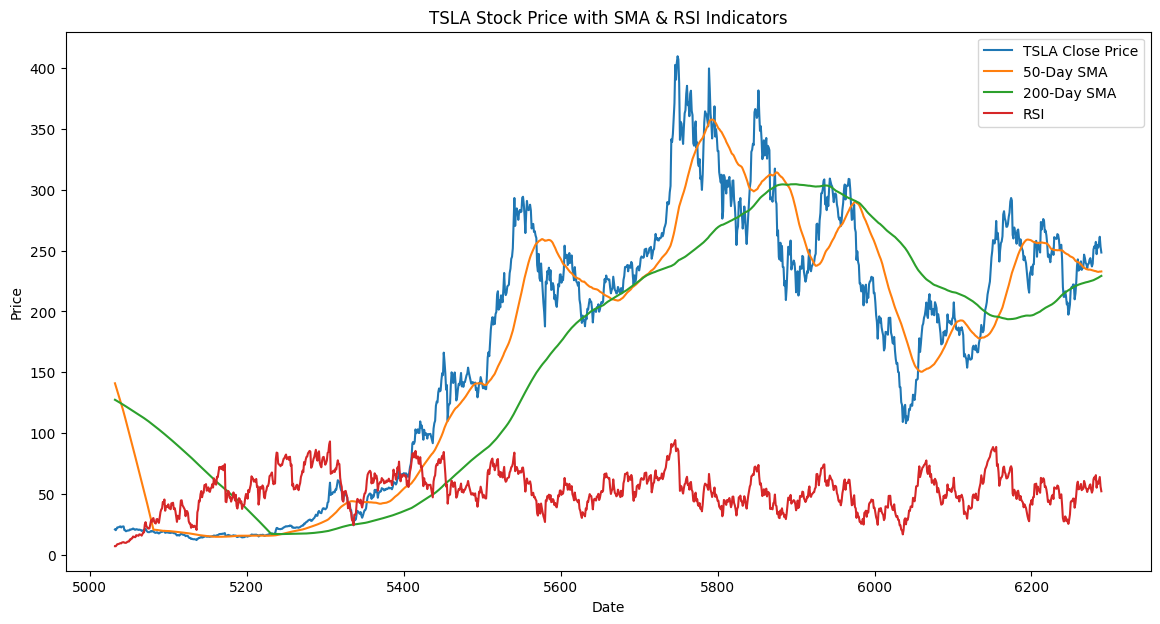

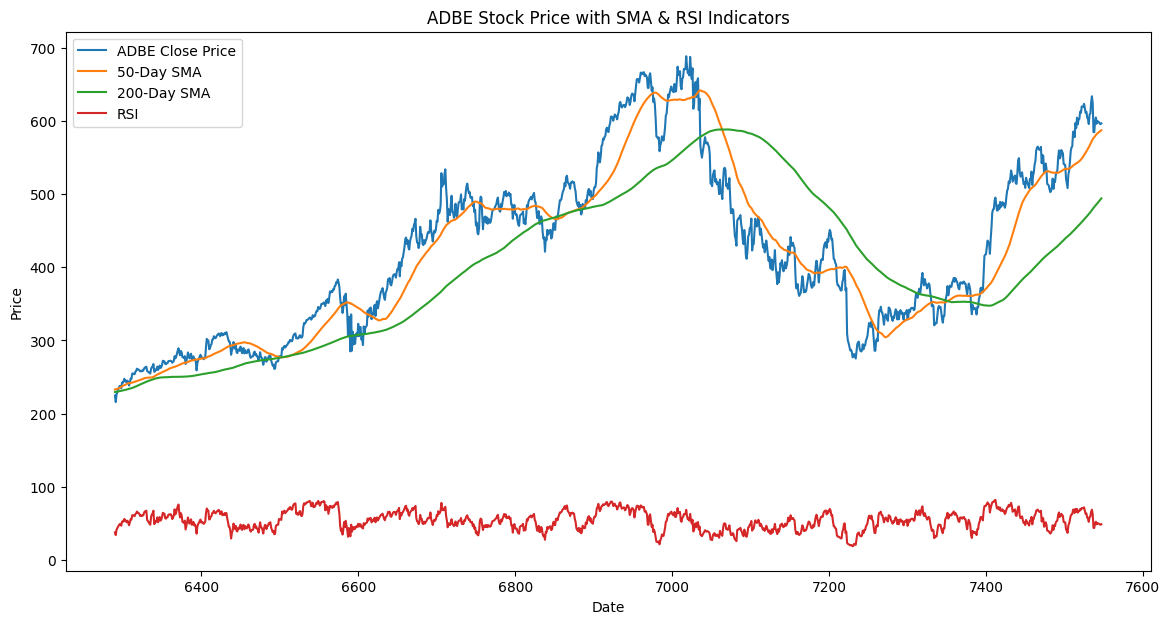

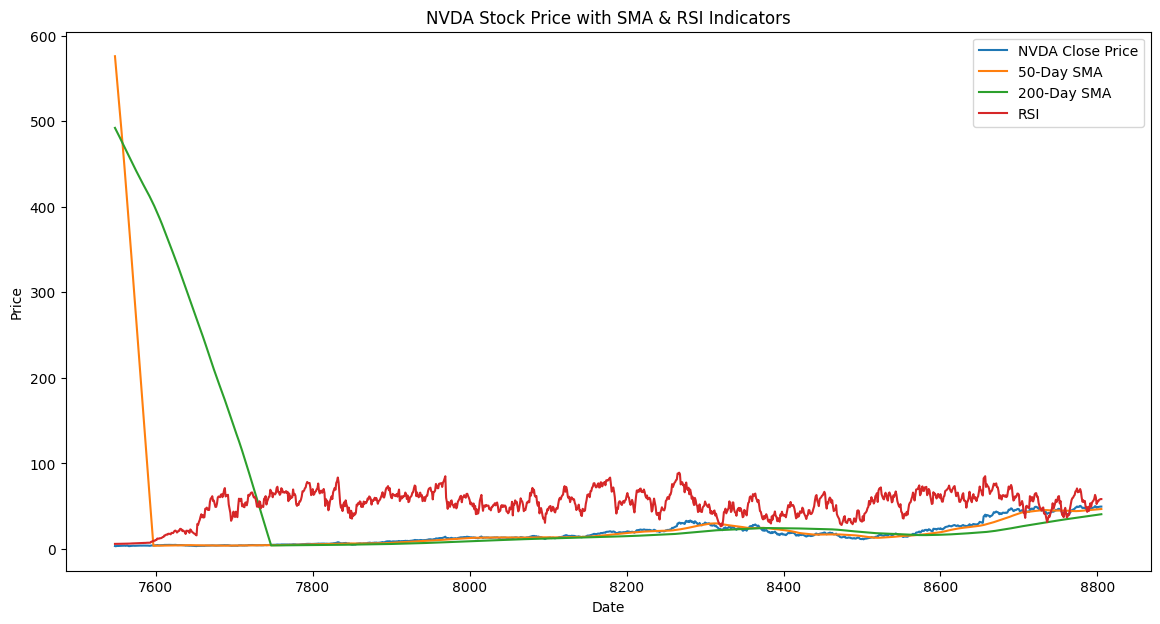

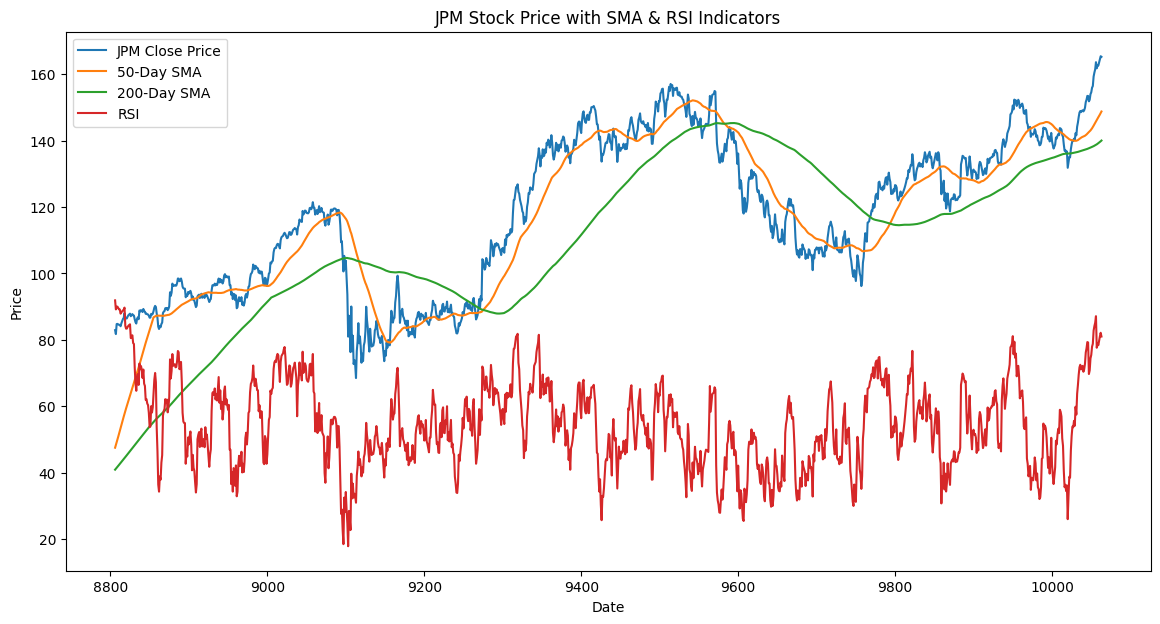

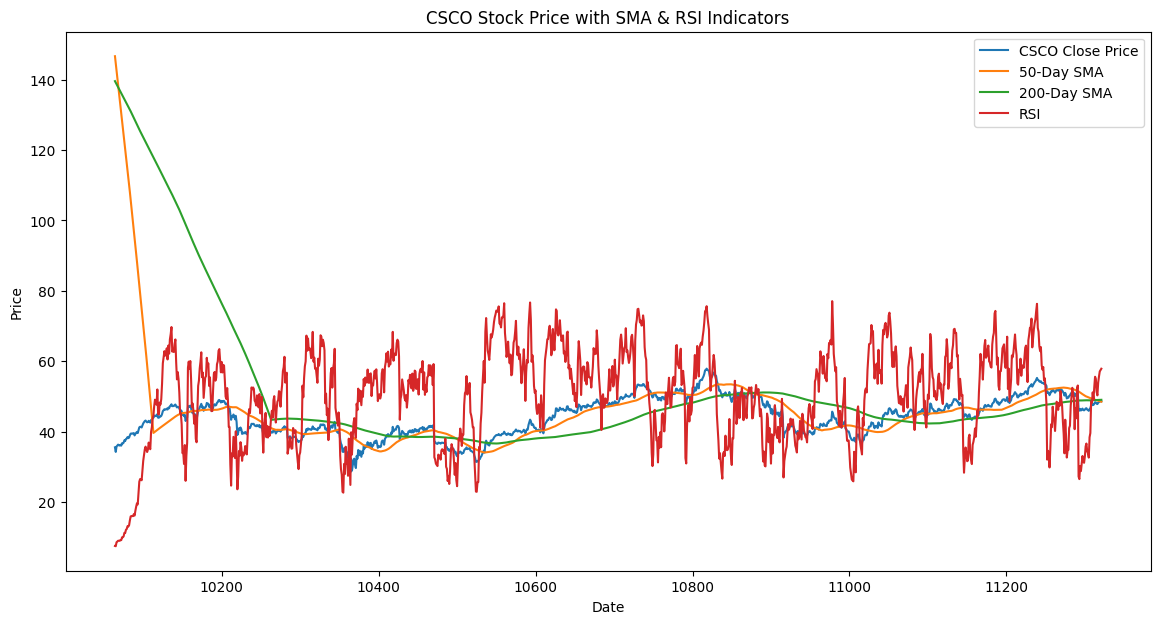

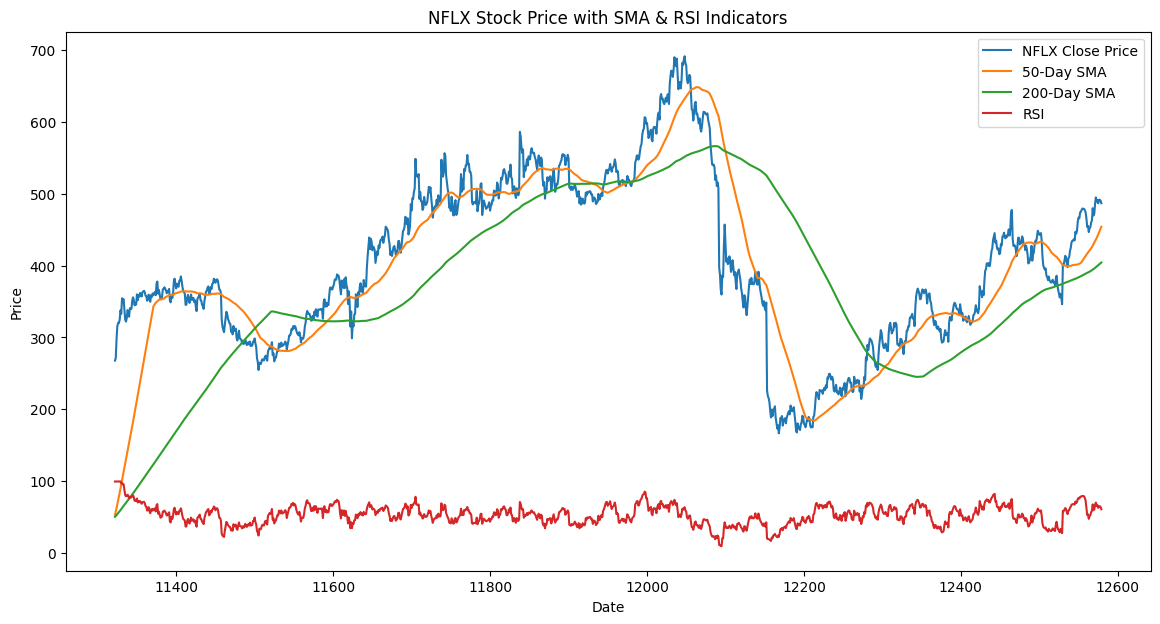

In [7]:
# Visualization example
for ticker in companies:
    plt.figure(figsize=(14, 7))
    company_data = final_data[final_data['Ticker'] == ticker]
    plt.plot(company_data.index, company_data['Close'], label=f'{ticker} Close Price')
    plt.plot(company_data.index, company_data['SMA_50'], label='50-Day SMA')
    plt.plot(company_data.index, company_data['SMA_200'], label='200-Day SMA')
    plt.plot(company_data.index, company_data['RSI'], label='RSI')
    plt.title(f'{ticker} Stock Price with SMA & RSI Indicators')
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.legend()
    plt.show()